# Importando librera y DF

In [5]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [6]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [7]:
df=pd.read_excel('colf.xlsx')

In [8]:
df.groupby(["año"])["Resumen"].count()

año
2000     2
2001     6
2002     8
2003     4
2004     5
2005     6
2006     3
2007     5
2008     8
2009    16
2010    20
2011    22
2012    29
2013    15
2014    18
2015    23
2016    21
2017    13
2018     9
2019     4
2020     2
Name: Resumen, dtype: int64

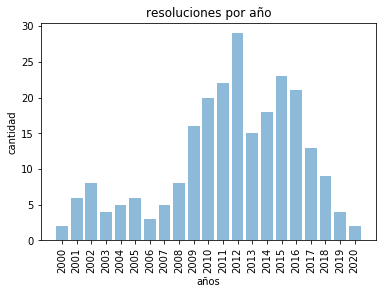

In [9]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [158]:
df=pd.read_excel('colf.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=7

#año
año=2016

#nombre
nombre=f"colf{año}.html"

In [159]:
#df=df[df["año"]==año]

In [160]:
df

,Título,Fecha,Resumen,Link,año
0,5929 de 2020,2020-03-05 00:00:00,"""Por la cual se modifican algunas disposicione...",https://www.crcom.gov.co/resoluciones/00005929...,2020
1,5937 de 2020,2020-03-12 00:00:00,Por la cual se modifica la Matriz de servicios...,https://www.crcom.gov.co/resoluciones/00005937...,2020
2,5587 de 2019,2019-01-10 00:00:00,Por la cual se modifican los artículos 2.2.2.1...,https://www.crcom.gov.co/resoluciones/00005587...,2019
3,5588 de 2019,2019-01-10 00:00:00,Por la cual se modifican algunas disposiciones...,https://www.crcom.gov.co/resoluciones/00005588...,2019
4,5589 de 2019,2019-01-10 00:00:00,Por la cual se modifica la Sección 2 del Capít...,https://www.crcom.gov.co/resoluciones/00005589...,2019
...,...,...,...,...,...
234,456 de 2001,2001-12-12 00:00:00,Por la cual se admite un recurso de reposición...,www.crcom.gov.co/resoluciones/00000456.pdf,2001
235,462 de 2001,2001-12-27 00:00:00,Por la cual se modifica y adiciona la Resoluci...,www.crcom.gov.co/resoluciones/00000462.pdf,2001
236,463 de 2001,2001-12-27 00:00:00,Por la cual se modifica el Título IV y el Títu...,www.crcom.gov.co/resoluciones/00000463.pdf,2001
237,338 de 2000,2000-12-20 00:00:00,Por medio de la cual se adoptan los manuales d...,www.crcom.gov.co/resoluciones/00000338.pdf,2000


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [161]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")

In [162]:
df

,Título,Fecha,Resumen,Link,año
0,5929 de 2020,2020-03-05 00:00:00,"""por la cual se modifican algunas disposicione...",https://www.crcom.gov.co/resoluciones/00005929...,2020
1,5937 de 2020,2020-03-12 00:00:00,por la cual se modifica la matriz de servicios...,https://www.crcom.gov.co/resoluciones/00005937...,2020
2,5587 de 2019,2019-01-10 00:00:00,por la cual se modifican los artículos . . . y...,https://www.crcom.gov.co/resoluciones/00005587...,2019
3,5588 de 2019,2019-01-10 00:00:00,por la cual se modifican algunas disposiciones...,https://www.crcom.gov.co/resoluciones/00005588...,2019
4,5589 de 2019,2019-01-10 00:00:00,por la cual se modifica la sección del capítul...,https://www.crcom.gov.co/resoluciones/00005589...,2019
...,...,...,...,...,...
234,456 de 2001,2001-12-12 00:00:00,por la cual se admite un recurso de reposición...,www.crcom.gov.co/resoluciones/00000456.pdf,2001
235,462 de 2001,2001-12-27 00:00:00,por la cual se modifica y adiciona la crt de y...,www.crcom.gov.co/resoluciones/00000462.pdf,2001
236,463 de 2001,2001-12-27 00:00:00,por la cual se modifica el título iv y el títu...,www.crcom.gov.co/resoluciones/00000463.pdf,2001
237,338 de 2000,2000-12-20 00:00:00,por medio de la cual se adoptan los manuales d...,www.crcom.gov.co/resoluciones/00000338.pdf,2000


In [163]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [164]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [165]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abierta,abierta radiodifundida,abierta radiodifundida establecidas,abonado,abonado marcación,abonado marcación xy,acceso,acceso uso,acceso uso infraestructura,acuerdo,...,xiii,xiii crt,xy,xy contenida,xy contenida anexo,xy servicio,xy servicio denominado,único,único prestación,único prestación servicios
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,2,1,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

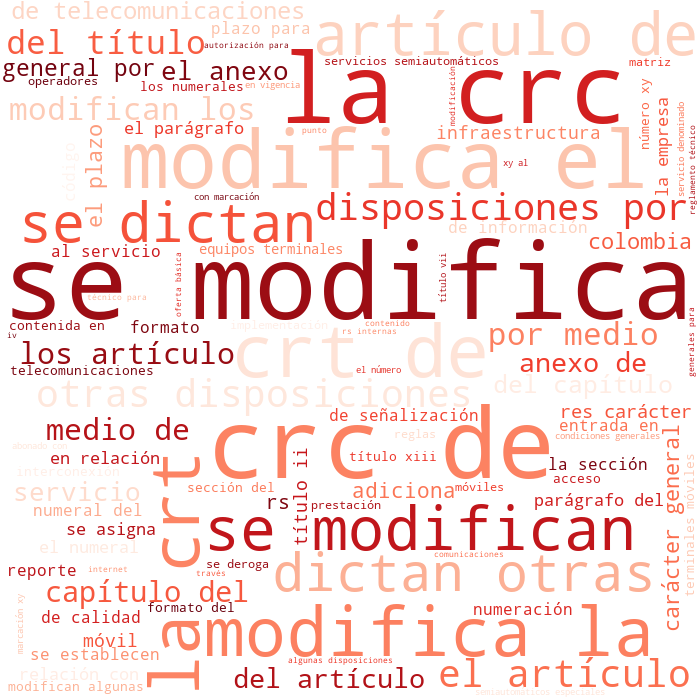

In [167]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [168]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [169]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
título, capítulo título, capítulo, crc, modifica, información, sección capítulo título, sección capítulo, sección, modifica sección capítulo, modifica sección, reportes información, título reportes, título reportes información, reportes

Topic #1:
crc, artículo, modifica, infraestructura, artículo crc, modifica artículo, modifica artículo crc, establecidas, televisión, modifican, rs, condiciones, generales, condiciones generales, rs televisión abierta

Topic #2:
modifica, telecomunicaciones, rs, reglamento, técnico rs internas, rs internas telecomunicaciones, rs internas, reglamento técnico rs, reglamento técnico, internas, internas telecomunicaciones, técnico, técnico rs, plazo entrada vigencia, vigencia

Topic #3:
crc, modifica, capítulo título, capítulo, título, modifica plazo, plazo, formato, móvil, contenida, entrada, técnicas contenida sección, capítulo título vii, contenida sección, contenida sección capítulo

Topic #4:
crc, modifica, disposiciones, dictan disposicion

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [170]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 4.44 s


Text(0, 0.5, 'log-likelihood')

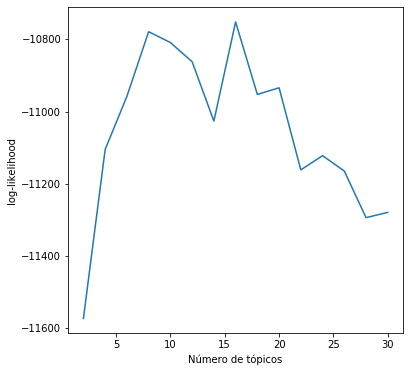

In [171]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [172]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [173]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook